# Feedforward Neural Networks

This week, we will introduce (artificial) neural networks, which are machine learning methods that draw inspiration from biological nervous systems where huge numbers of interconnected neurons (nerve cells) send electricalchemical signals, frequently in response to external stimuli, to one another throughout the body and within the brain.

Neural networks excel at machine learning tasks when large amounts of data is available (thousands of datapoints). We will, for now, focus on the applications of neural networks to classification and regression problems.

This week's notes will be mostly dedicated sharing my code with you because we will primarily be studying from <a href="http://neuralnetworksanddeeplearning.com/">*Neural Networks and Deep Learning*</a> by Michael Nielsen. This <a href="https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi">playlist of YouTube videos</a> is based on Nielsen's book and is pretty amazing for explaining this content as well. I cannot recommend it enough!

<a href="https://github.com/mnielsen/neural-networks-and-deep-learning">Nielsen's code</a> is written in Python 2.7, so I would not recommend using his code, but Michal Daniel Dobrzanski provides <a href="https://github.com/MichalDanielDobrzanski/DeepLearningPython35">updated code</a> in Python 3.5.

## Perceptrons

Refer to my PDF notes for details, but we will write some code for Perceptrons below. First, we import numpy.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
class Perceptron:
    
    def __init__(self, N, alpha = 0.1):
        # initialize the weights randomly and learning rate
        self.W = np.random.randn(N + 1)
        self.alpha = alpha
        
    def fit(self, X, y, epochs = 10):
        # insert a column of 1s at the end of X
        X = np.hstack((X, np.ones([X.shape[0], 1])))
        
        for epoch in range(epochs):
            # do the dot product between w and x
            for (x, target) in zip(X,y):
                
                dotProduct = np.dot(x, self.W)
                
                if dotProduct < 0 and target == 1:
                    self.W += self.alpha*x
                
                if dotProduct >= 0 and target == 0:
                    self.W -= self.alpha*x
                    
    def predict(self, X):
        X = np.hstack((X, np.ones([X.shape[0], 1])))
        
        predictedY = np.zeros([X.shape[0], 1])
        
        for counter in range(X.shape[0]):
            dotProduct = np.dot(X[counter,], self.W)
            
            if dotProduct < 0:
                predictedY[counter] = 0
            
            else:
                predictedY[counter] = 1
                
        return predictedY

### Example: OR function

In [5]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])

model = Perceptron(X.shape[1], alpha=0.1)
model.fit(X, y, epochs=100)
yPredicted = model.predict(X)

print(classification_report(y, yPredicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



As we can see, it works perfectly at approximating the OR function since the data is linearly separable.

### Example: Random Points

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.73      0.83      0.78        23

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.79      0.78      0.78        50



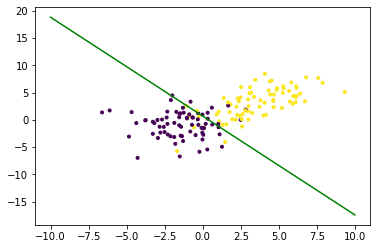

In [6]:
# number of points to generate
numberOfPoints = 100

# generate points from class 0
mean1 = np.array([-1, -1])
covariance1 = np.array([[5, 0], [0, 5]])
X1 = np.random.multivariate_normal(mean1, covariance1, numberOfPoints)

# generate points from class 1
mean2 = np.array([3, 3])
covariance2 = np.array([[5, 3], [3, 5]])
X2 = np.random.multivariate_normal(mean2, covariance2, numberOfPoints)

# stack the points
X = np.vstack((X1, X2))

# create a vector of the labels
y = np.hstack((numberOfPoints * [0], numberOfPoints * [1]))

# train test split
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size = 0.25, random_state = 1)

# instantiate a model
model = Perceptron(2)

# fit the model to the training data
model.fit(trainX, trainY, epochs = 1000)
predictedY = model.predict(testX)

print(classification_report(testY, predictedY))

# plot the training set
plt.scatter(trainX[:,0], trainX[:,1], c = trainY, marker = '.')

parameters = model.W

xModel = np.linspace(-10, 10, 100)
yModel = -parameters[0]/parameters[1]*xModel - parameters[2]/parameters[0]
lineFormula = '{:.3f}x_1+{:.3f}x_2+{:.3f}=0'.format(parameters[0], parameters[1], parameters[2])
plt.plot(xModel, yModel, 'g', label = lineFormula)

In this case, the Perceptron algorithm can achieve decent accuracy on test accuracy at 78%, but the method clearly has its limitations since it can only create a linear decision boundary. It has performed as well as it can under this restriction, but it is typically a poor assumption for practical binary classification problems.

## Code for Feedforward Neural Networks

Let's take it a step forward and write some code for neural networks (to be continued!)

There are three main bits of code we need to make neural nets work. Assume that we have a training dataset $X$.

1. **Forward pass**: feeds a datapoint into a neural network and processes it by computing the outputs of each layer of artificial neurons until we reach the output layer and compute the loss

2. **Stochastic gradient descent (SGD)**: after feeding in some data and computing the loss, we need to adjust the weights in such a way to reduce the loss function (in the opposite direction of the gradient)

3. **Backpropagation (Backprop)**: to find gradient formulas, this will use the chain rule in a systematic way to find the gradient of the loss function

### The Forward Pass

The forward pass is simple, we just follow the simple rules of the individual neurons, but we have to do it **many** times, which we can automate with matrix multiplication (see our notes from class on Sept 3).

### Stochastic Gradient Descent

We already know what gradient descent is, we run our model on training data, compute the loss function, find the gradient of the loss function (i.e. the derivatives of the loss function with respect to each parameter), and update our parameters in the opposite direction of the gradient by a small amount. The same general approach will be used in most neural networks.

In linear models, we compute the outputs and loss function for the entire dataset (usually multiple times) per iteration of gradient descent, make a weight update based on the gradient, and repeat. At the other end of the spectrum, the Perceptron algorithm made a weight update for every single datapoint input.

The typical approach in neural networks is **stochastic** gradient descent (SGD). It turns out, computing outputs for the whole dataset or only a single input before making a weight update is expensive, but doing a weight update after each datapoint would be a bad idea because outlier datapoints might have an overly strong pull on parameters. SGD takes a middle path: update weights after processing a random sample, called a **mini-batch**, of datapoints--enough points to reduce the variance of using just one for more stable convergence of parameters, but not so much that the computation is not too expensive. In this way, we process a mini-batch for outputs, compute an approximate loss function and approximate gradients, update weights, and repeat

How large should our mini-batches be? Typically, using $2^n$ for something like $n=5, 6, 7, 8$ because these values tend to be ideal for the linear algebra optimization libraries we use (NumPy, TensorFlow, etc). The mini-batch size is a hyperparameter, but it generally isn't one you need to tweak. One exception is if you are using GPUs for computing: then, it's best to choose the largest power of 2 that allows a whole mini-batch to fit into GPU memory.


### Backpropagation

In the past, we approximated the gradient by computing the loss functions many times, perturbed in each dimension to compute

$$\nabla L(\beta)\approx\left(\frac{L(\beta+he_0)-L(\beta)}{h}, ..., \frac{L(\beta+he_d)-L(\beta)}{h}\right)$$

for some small value $h$, but this meant we had to compute the loss function $d+2$ times for **each** iteration in gradient descent, which required us to compute the outputs of the model for the whole dataset many, many times. This was fine for the linear regression models we have considered, but it would be too computationally expensive to feed the whole dataset through a neural network so many times.

As a result, we instead need another method to compute gradients. It turns out, we can systematically apply the chain rule to get formulas for the partial derivatives of the loss function with respect to each weight in the neural network. Backpropagation does just this.

### Feedforward Neural Network Class

We will write the three parts above as functions within a class for constructing feedforward neural networks.

First, import some packages.

In [7]:
import numpy as np

Now, we can write our class.

In [8]:
class FeedforwardNeuralNetwork:
    
    # input a vector [a, b, c, ...] with the number of nodes in each layer
    def __init__(self, layers, alpha = 0.1):
        # list of weight matrices between layers
        self.W = []
        
        # network architecture will be a vector of numbers of nodes for each layer
        self.layers = layers
        
        # learning rate
        self.alpha = alpha
        
        # initialize the weights (randomly) -- this is our initial guess for gradient descent
        
        # initialize the weights between layers (up to the next-to-last one) as normal random variables
        for i in np.arange(0, len(layers) - 2):
            self.W.append(np.random.randn(layers[i] + 1, layers[i + 1] + 1))
            
        # initialize weights between the last two layers (we don't want bias for the last one)
        self.W.append(np.random.randn(layers[-2] + 1, layers[-1]))
        
    # define the sigmoid activation
    def sigmoid(self, x):
        return 1.0 / (1 + np.exp(-x))
    
    # define the sigmoid derivative (where z is the output of a sigmoid)
    def sigmoidDerivative(self, z):
        return z * (1 - z)
    
    # fit the model
    def fit(self, X, y, epochs = 10000, update = 1000):
        # add a column of ones to the end of X
        X = np.hstack((X, np.ones([X.shape[0],1])))

        for epoch in np.arange(0,epochs):

            # feed forward, backprop, and weight update
            for (x, target) in zip(X, y):
                # make a list of output activations from the first layer
                # (just the original x values)
                A = [np.atleast_2d(x)]
                
                # feed forward
                for layer in np.arange(0, len(self.W)):
                    
                    # feed through one layer and apply sigmoid activation
                    net = A[layer].dot(self.W[layer])
                    out = self.sigmoid(net)
                    
                    # add our network output to the list of activations
                    A.append(out)
                    
                # backpropagation
                error = A[-1] - target
                
                D = [error * self.sigmoidDerivative(A[-1])]
                
                # loop backwards over the layers to build up deltas
                for layer in np.arange(len(A) - 2, 0, -1):
                    delta = D[-1].dot(self.W[layer].T)
                    delta = delta * self.sigmoidDerivative(A[layer])
                    D.append(delta)
                    
                # reverse the deltas since we looped in reverse
                D = D[::-1]
                
                # weight update
                for layer in np.arange(0, len(self.W)):
                    self.W[layer] -= self.alpha * A[layer].T.dot(D[layer])
                    
            if (epoch + 1) % update == 0:
                loss = self.computeLoss(X,y)
                print("[INFO] epoch = {}, loss = {:.6f}".format(epoch + 1, loss))
                
    def predict(self, X, addOnes = True):
        # initialize data, be sure it's the right dimension
        p = np.atleast_2d(X)
        
        # add a column of 1s for bias
        if addOnes:
            p = np.hstack((p, np.ones([X.shape[0],1])))
        
        # feed forward!
        for layer in np.arange(0, len(self.W)):
            p = self.sigmoid(np.dot(p, self.W[layer]))
            
        return p
    
    def computeLoss(self, X, y):
        # initialize data, be sure it's the right dimension
        y = np.atleast_2d(y)
        
        # feed the datapoints through the network to get predicted outputs
        predictions = self.predict(X, addOnes = False)
        loss = np.sum((predictions - y)**2) / 2.0
        
        return loss

In [9]:
model = FeedforwardNeuralNetwork([2, 2, 1])
vars(model)

{'W': [array([[-0.38991208,  1.32529503, -0.59159794],
         [ 0.0537628 , -0.42082578,  0.07169667],
         [-0.55317831,  0.0992883 ,  0.43780998]]),
  array([[ 1.3760365 ],
         [-0.79495758],
         [-0.08420548]])],
 'layers': [2, 2, 1],
 'alpha': 0.1}

### Example: XOR function

Let's run the code to try to learn the XOR function.

In [10]:
import random

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

random.seed(1)
model.fit(X,y,50000,10000)

[INFO] epoch = 10000, loss = 0.004372
[INFO] epoch = 20000, loss = 0.001625
[INFO] epoch = 30000, loss = 0.000980
[INFO] epoch = 40000, loss = 0.000698
[INFO] epoch = 50000, loss = 0.000540


In [11]:
model.predict(X)

array([[0.01352989],
       [0.98124415],
       [0.98447466],
       [0.01745549]])

Note these are very close to 0, 1, 1, 0 -- the correct classifications for the XOR function. This neural net can classify this nonlinear problem of XOR, which the Perceptron could not do.

### Example: Tiny MNIST

In [12]:
# load some more packages
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn import datasets

Let's try to classify a tiny version of the MNIST data shrunk down to 8-by-8 pixel images.

In [13]:
### CLASSIFY MNIST PICTURES

# 'digits' is a tiny version of MNIST in sklearn.datasets has only 8 x 8 pixels
# with grayscale values from 0 to 16
digits = datasets.load_digits()
data = digits.data.astype("float")
print("Samples: {}, Dimension: {}".format(data.shape[0], data.shape[1]))

X = data

Y = digits.target

# randomly choose 75% of the data to be the training set and 25% for the testing set
(trainX, testX, trainY, testY) = train_test_split(X, Y, test_size = 0.25)

# we need to turn the labels into 1-hot representations
trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

# fit the model to the training data
model = FeedforwardNeuralNetwork([64, 16, 10])
model.fit(trainX,trainY,1000,100)

# print the classification performance
print("Training set accuracy")

predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)

trainY = trainY.argmax(axis=1)

print(classification_report(trainY, predictedY))

print("Test set accuracy")

predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)

testY = testY.argmax(axis=1)

print(classification_report(testY, predictedY))

Samples: 1797, Dimension: 64
[INFO] epoch = 100, loss = 19.832824
[INFO] epoch = 200, loss = 15.293100
[INFO] epoch = 300, loss = 10.664704
[INFO] epoch = 400, loss = 9.386519
[INFO] epoch = 500, loss = 8.806930
[INFO] epoch = 600, loss = 8.408205
[INFO] epoch = 700, loss = 8.144839
[INFO] epoch = 800, loss = 7.920782
[INFO] epoch = 900, loss = 7.748000
[INFO] epoch = 1000, loss = 7.620783
Training set accuracy
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       0.98      0.99      0.99       130
           2       1.00      0.99      1.00       134
           3       1.00      1.00      1.00       146
           4       0.99      0.99      0.99       136
           5       0.99      0.99      0.99       134
           6       1.00      1.00      1.00       130
           7       1.00      0.99      1.00       126
           8       0.97      0.99      0.98       141
           9       1.00      0.99      0.99 

Let's try the same with two hidden layers.

In [14]:
### CLASSIFY MNIST PICTURES

# 'digits' is a tiny version of MNIST in sklearn.datasets has only 8 x 8 pixels
# with grayscale values from 0 to 16
digits = datasets.load_digits()
data = digits.data.astype("float")
print("Samples: {}, Dimension: {}".format(data.shape[0], data.shape[1]))

X = data/16.0

Y = digits.target

# randomly choose 75% of the data to be the training set and 25% for the testing set
(trainX, testX, trainY, testY) = train_test_split(X, Y, test_size = 0.25)

# we need to turn the labels into 1-hot representations
trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

# fit the model to the training data
model = FeedforwardNeuralNetwork([64, 32, 16, 10])
model.fit(trainX,trainY,1000,10)

# print the classification performance
print("Training set accuracy")

predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)

trainY = trainY.argmax(axis=1)

print(classification_report(trainY, predictedY))

print("Test set accuracy")

predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)

testY = testY.argmax(axis=1)

print(classification_report(testY, predictedY))

Samples: 1797, Dimension: 64
[INFO] epoch = 10, loss = 106.295932
[INFO] epoch = 20, loss = 47.511727
[INFO] epoch = 30, loss = 29.678752
[INFO] epoch = 40, loss = 21.457581
[INFO] epoch = 50, loss = 16.604494
[INFO] epoch = 60, loss = 13.165102
[INFO] epoch = 70, loss = 11.048393
[INFO] epoch = 80, loss = 9.728566
[INFO] epoch = 90, loss = 8.795719
[INFO] epoch = 100, loss = 8.079752
[INFO] epoch = 110, loss = 7.162520
[INFO] epoch = 120, loss = 6.405322
[INFO] epoch = 130, loss = 6.022470
[INFO] epoch = 140, loss = 5.738313
[INFO] epoch = 150, loss = 5.428372
[INFO] epoch = 160, loss = 4.931159
[INFO] epoch = 170, loss = 4.602481
[INFO] epoch = 180, loss = 4.259271
[INFO] epoch = 190, loss = 4.000888
[INFO] epoch = 200, loss = 3.799291
[INFO] epoch = 210, loss = 3.644610
[INFO] epoch = 220, loss = 3.518565
[INFO] epoch = 230, loss = 3.399609
[INFO] epoch = 240, loss = 3.232014
[INFO] epoch = 250, loss = 3.023988
[INFO] epoch = 260, loss = 2.887872
[INFO] epoch = 270, loss = 2.794499


Almost all test images were labeled correctly, 97%! But let's take a look at the ones that were labeled wrong. Most look a bit ambiguous or messy, so it's not that surprising they were not classified correctly.

4
The correct label is 9
The predicted label is 3
21
The correct label is 3
The predicted label is 9
96
The correct label is 9
The predicted label is 8
132
The correct label is 6
The predicted label is 2
160
The correct label is 8
The predicted label is 1
179
The correct label is 9
The predicted label is 7
241
The correct label is 2
The predicted label is 3
257
The correct label is 2
The predicted label is 3
267
The correct label is 1
The predicted label is 5
290
The correct label is 3
The predicted label is 8
307
The correct label is 8
The predicted label is 7
318
The correct label is 9
The predicted label is 8
351
The correct label is 5
The predicted label is 8
356
The correct label is 8
The predicted label is 3


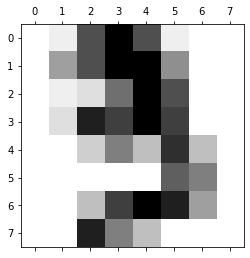

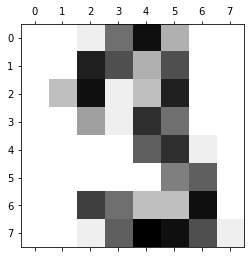

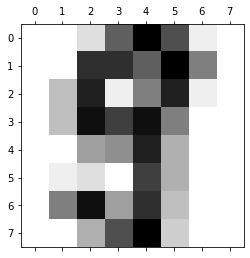

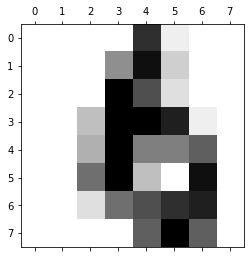

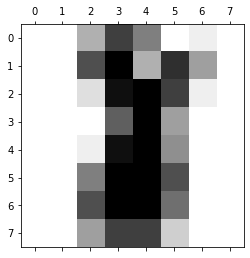

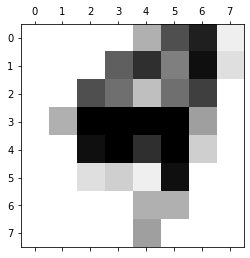

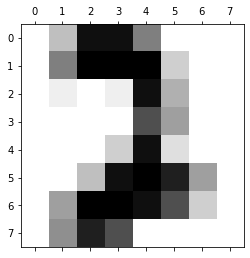

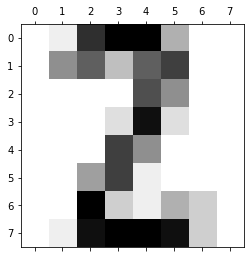

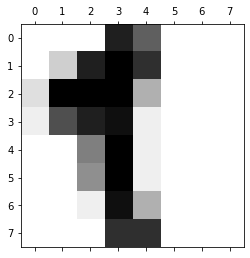

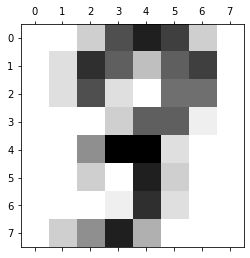

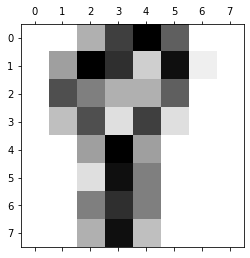

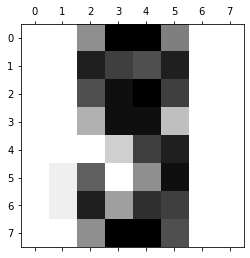

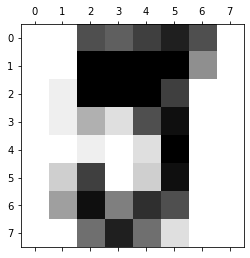

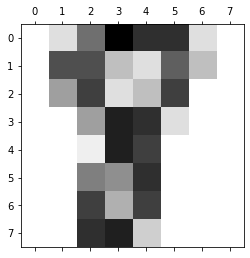

In [15]:
import matplotlib.pyplot as plt

for i in range(testX.shape[0]):
    if testY[i] != predictedY[i]:
        print(i)
        print('The correct label is', testY[i])
        print('The predicted label is', predictedY[i])
        plt.matshow(16*testX[i].reshape(8,8), cmap='gray_r')

### Example: Full-Size MNIST

In [16]:
### CLASSIFY MNIST PICTURES

# create a dataset of 1000 MNIST images, reshaped as single vectors, and labels
data = mnist.load_data()

# The datapoints are in mnistData[0][0]
X = data[0][0][:1000].reshape([1000,28*28])
X = X/255.0

# The labels are in mnistData[0][1]
Y = data[0][1][:1000]

# randomly choose 75% of the data to be the training set and 25% for the testing set
(trainX, testX, trainY, testY) = train_test_split(X, Y, test_size = 0.25)

trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

# fit the model to the training data
model = FeedforwardNeuralNetwork([784, 16, 10], 0.5)
model.fit(trainX,trainY,1000,100)

# print the classification performance
print("Training set accuracy")
predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)

trainY = trainY.argmax(axis=1)
print(classification_report(trainY, predictedY))

print("Test set accuracy")
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)

testY = testY.argmax(axis=1)
print(classification_report(testY, predictedY))

[INFO] epoch = 100, loss = 13.848518
[INFO] epoch = 200, loss = 11.653992
[INFO] epoch = 300, loss = 10.861223
[INFO] epoch = 400, loss = 9.788515
[INFO] epoch = 500, loss = 9.650853
[INFO] epoch = 600, loss = 8.223326
[INFO] epoch = 700, loss = 8.140604
[INFO] epoch = 800, loss = 8.112920
[INFO] epoch = 900, loss = 7.601556
[INFO] epoch = 1000, loss = 7.586467
Training set accuracy
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       0.98      1.00      0.99        85
           2       0.99      0.97      0.98        76
           3       0.96      1.00      0.98        71
           4       1.00      0.97      0.99        80
           5       0.99      0.99      0.99        74
           6       0.99      0.97      0.98        70
           7       0.99      1.00      0.99        84
           8       0.98      0.93      0.95        68
           9       0.97      0.96      0.96        71

    accuracy      

Here, we have an **overfitting** problem because the training accuracy is good, but test accuracy is significantly worse. This frequently happens when we use a small dataset. In this case, we used only 1000 images, but it still took a several minutes to run. If we used 10000 images, which would be a more ideal dataset, it would take 30-40 minutes! This is no good...